In [1]:
import folium
from folium.plugins import HeatMap
from folium.plugins import MousePosition
from folium.plugins import MiniMap

import pandas as pd

import geopandas as gpd
from scipy.interpolate import NearestNDInterpolator

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from mpl_toolkits.basemap import Basemap


In [2]:
data = pd.read_csv('../data/Dataset1.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22266 entries, 0 to 22265
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECTID          22266 non-null  int64  
 1   Oceans            21995 non-null  object 
 2   Regions           10190 non-null  object 
 3   SubRegions        1451 non-null   object 
 4   Sampling Method   22266 non-null  object 
 5   Measurement       16449 non-null  float64
 6   Unit              22266 non-null  object 
 7   Density Range     22266 non-null  object 
 8   Density Class     22266 non-null  object 
 9   Short Reference   22266 non-null  object 
 10  Long Reference    22266 non-null  object 
 11  DOI               22266 non-null  object 
 12  Organization      22266 non-null  object 
 13  Keywords          22014 non-null  object 
 14  Accession Number  22266 non-null  int64  
 15  Accession Link    22266 non-null  object 
 16  Latitude          22266 non-null  float6

In [4]:
data.head()
data.tail()

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,...,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y
22261,22334,Atlantic Ocean,NaN,NaN,Petite Ponar benthic grab,43.333333,pieces kg-1 d.w.,20-150,Medium,Rodrigues et al. 2022,...,"NOVA University Lisbon, Caparica, Portugal","Arrábida, Portugal",279326,https://www.ncei.noaa.gov/access/metadata/land...,38.48294,-8.94286,2/27/2019 12:00:00 AM,8186aa9e-f061-4e60-bc93-35cecea71b50,-8.94286,38.48294
22262,22335,Atlantic Ocean,NaN,NaN,Petite Ponar benthic grab,43.333333,pieces kg-1 d.w.,20-150,Medium,Rodrigues et al. 2022,...,"NOVA University Lisbon, Caparica, Portugal","Arrábida, Portugal",279326,https://www.ncei.noaa.gov/access/metadata/land...,38.46124,-8.99428,2/27/2019 12:00:00 AM,0e2c5b28-b51b-4763-acec-c708af61683f,-8.99428,38.46124
22263,22336,Atlantic Ocean,NaN,NaN,Petite Ponar benthic grab,76.666667,pieces kg-1 d.w.,20-150,Medium,Rodrigues et al. 2022,...,"NOVA University Lisbon, Caparica, Portugal","Arrábida, Portugal",279326,https://www.ncei.noaa.gov/access/metadata/land...,38.44652,-9.04146,2/27/2019 12:00:00 AM,c4d70e52-ba68-42e3-93cf-160d0e516095,-9.04146,38.44652
22264,22337,Atlantic Ocean,NaN,NaN,Petite Ponar benthic grab,23.333333,pieces kg-1 d.w.,20-150,Medium,Rodrigues et al. 2022,...,"NOVA University Lisbon, Caparica, Portugal","Arrábida, Portugal",279326,https://www.ncei.noaa.gov/access/metadata/land...,38.43987,-9.09325,2/27/2019 12:00:00 AM,5b5534c5-f6e5-43b2-b6fd-f1da28dc771e,-9.09325,38.43987
22265,22338,Atlantic Ocean,NaN,NaN,Petite Ponar benthic grab,86.666667,pieces kg-1 d.w.,20-150,Medium,Rodrigues et al. 2022,...,"NOVA University Lisbon, Caparica, Portugal","Arrábida, Portugal",279326,https://www.ncei.noaa.gov/access/metadata/land...,38.42905,-9.14605,2/27/2019 12:00:00 AM,f3b0c581-b84f-4ac6-9007-1f8b97671ad9,-9.14605,38.42905


In [5]:
data2 = data

In [6]:
data2.columns   

Index(['OBJECTID', 'Oceans', 'Regions', 'SubRegions', 'Sampling Method',
       'Measurement', 'Unit', 'Density Range', 'Density Class',
       'Short Reference', 'Long Reference', 'DOI', 'Organization', 'Keywords',
       'Accession Number', 'Accession Link', 'Latitude', 'Longitude', 'Date',
       'GlobalID', 'x', 'y'],
      dtype='object')

In [7]:
ranges = data2['Density Class'].unique()
print("Density Classes:", ranges)

Density Classes: ['Very Low' 'Low' 'Medium' 'High' 'Very High']


In [8]:
data2 = data2.dropna(subset=['Measurement'])

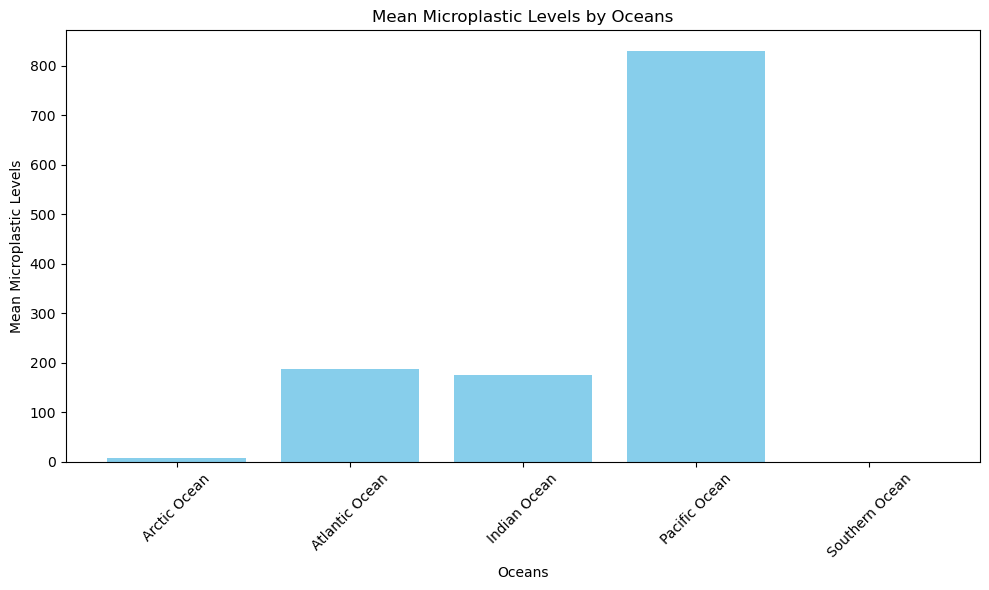

In [9]:
grouped_data = data2.groupby('Oceans')['Measurement'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Oceans'], grouped_data['Measurement'], color='skyblue')
plt.xlabel('Oceans')
plt.ylabel('Mean Microplastic Levels')
plt.title('Mean Microplastic Levels by Oceans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.show()

In [10]:
data_inranges = data2[data2['Density Class'].isin(ranges)]

In [11]:
count_values = data_inranges['Density Class'].value_counts()
print(count_values)

Medium       7681
Very Low     4887
Low          2030
High         1269
Very High     582
Name: Density Class, dtype: int64


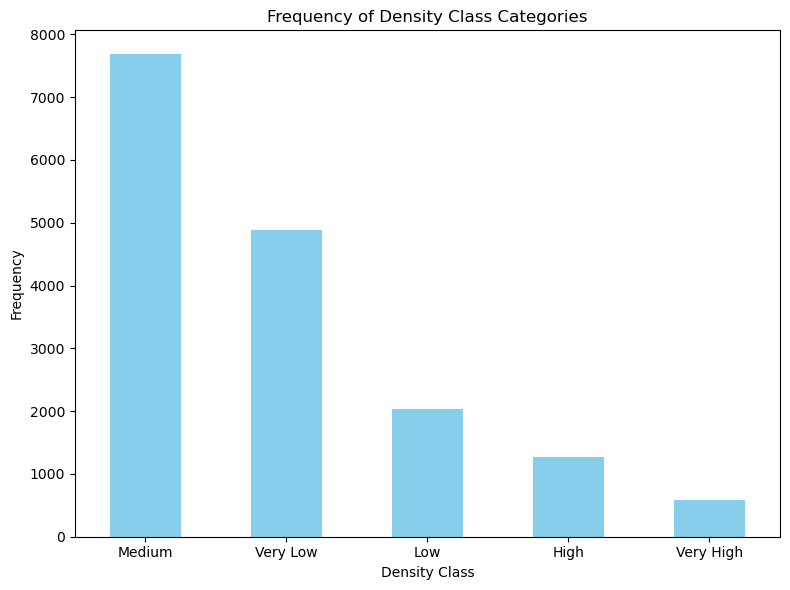

In [12]:
plt.figure(figsize=(8, 6))
count_values.plot(kind='bar', color='skyblue')
plt.xlabel('Density Class')
plt.ylabel('Frequency')
plt.title('Frequency of Density Class Categories')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))

gdf.dropna(subset=['Measurement'], inplace=True)

In [14]:
def fill_nan_with_mean(gdf):
    coords = gdf[['Longitude', 'Latitude']].values
    measurements = gdf['Measurement'].values

    interpolator = NearestNDInterpolator(coords, measurements)

    nan_indices = gdf['Measurement'].isna()

    gdf.loc[nan_indices, 'Measurement'] = interpolator(gdf[['Longitude', 'Latitude']][nan_indices])
    
    return gdf

In [15]:
gdf = fill_nan_with_mean(gdf)

In [16]:
map_center = [gdf.geometry.y.mean(), gdf.geometry.x.mean()]

map = folium.Map(location=map_center, zoom_start=4)

folium.plugins.Fullscreen(
    position="topright",
    title="Expand me",
    title_cancel="Exit me",
    force_separate_button=True,
).add_to(map)

MousePosition().add_to(map)

map = folium.Map(location=map_center, zoom_start=4)

MiniMap(tile_layer="Cartodb dark_matter", zoom_level_offset=-10).add_to(map)

data = gdf.drop(columns=['geometry'])

In [17]:
heat_data = data[['Latitude', 'Longitude', 'Measurement']].values.tolist()
HeatMap(heat_data, radius=10, blur=5).add_to(map)

In [30]:
map.save("map.html")

In [18]:
features = gdf[['Longitude', 'Latitude']]
print(features)

       Longitude  Latitude
0      -60.29000  45.28000
1      -70.65000  40.93000
2      -70.65000  40.93000
3      -69.77000  40.30000
4      -67.15000  39.88000
...          ...       ...
22261   -8.94286  38.48294
22262   -8.99428  38.46124
22263   -9.04146  38.44652
22264   -9.09325  38.43987
22265   -9.14605  38.42905

[16449 rows x 2 columns]


In [19]:
kmeans = KMeans(
    init="random",
    n_clusters=7,
    n_init=1000,
    max_iter=30000,
    random_state=42
)

kmeans.fit(features)


KMeans(init='random', max_iter=30000, n_clusters=7, n_init=1000,
       random_state=42)

In [20]:
labels = kmeans.labels_

In [21]:
gdf['cluster'] = labels
_clusters = gdf.groupby('cluster')['Measurement'].count()
print(_clusters)

cluster
0    1053
1     402
2    7289
3    2499
4    3746
5     557
6     903
Name: Measurement, dtype: int64


In [22]:
# for cluster_id in range(16): 
    
#     cluster_data = gdf[gdf['cluster'] == cluster_id]
#     cluster_group = folium.FeatureGroup(name=f'Cluster {cluster_id}')
    
#     for _, row in cluster_data.iterrows():
#         folium.Marker([row['Latitude'], row['Longitude']], popup=f"Cluster: {cluster_id}").add_to(cluster_group)
    

#     cluster_group.add_to(map)

In [23]:
# folium.LayerControl().add_to(map)

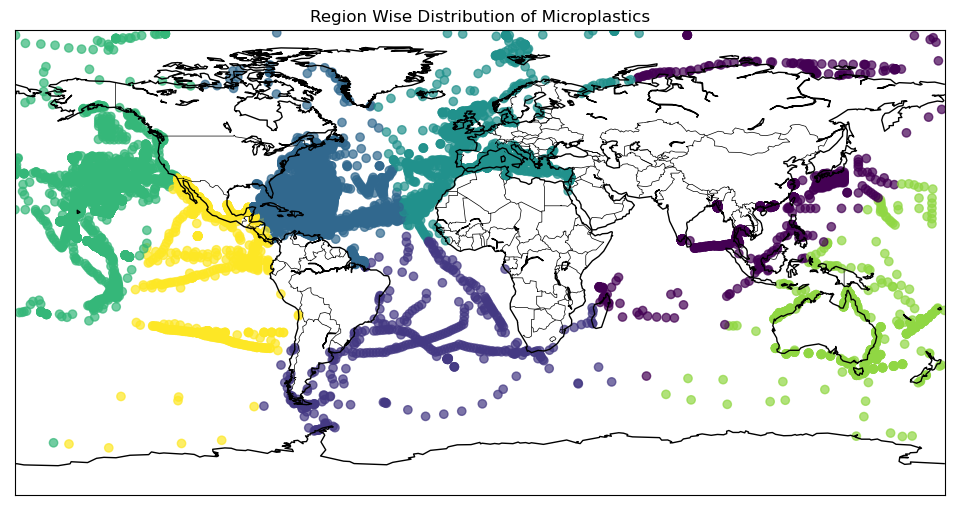

In [24]:

plt.figure(figsize=(12, 8))

m = Basemap(projection='cyl')


m.drawcoastlines()
m.drawcountries()

x, y = m(gdf['Longitude'].values, gdf['Latitude'].values)

m.scatter(x, y, c=gdf['cluster'], cmap='viridis', alpha=0.7)

plt.title('Region Wise Distribution of Microplastics')

plt.show()



In [25]:
print(len(ranges))

5


In [26]:
features2 = gdf[['Measurement']]

kmeans = KMeans(
    init="random",
    n_clusters=25, 
    n_init=100,
    max_iter=3000,
    random_state=42
)
kmeans.fit(features2)


labels2 = kmeans.labels_
gdf['cluster'] = labels2


_clusters = gdf.groupby('cluster')['Measurement'].count()
print(_clusters)



cluster
0     12705
1       181
2         1
3       226
4         1
5        40
6         1
7         1
8      1601
9         1
10      203
11        1
12      777
13        1
14       83
15        1
16        1
17      193
18      253
19        3
20        6
21       25
22      118
23       17
24        9
Name: Measurement, dtype: int64


Text(0.5, 1.0, 'Spatial Distribution of Concentration Clusters')

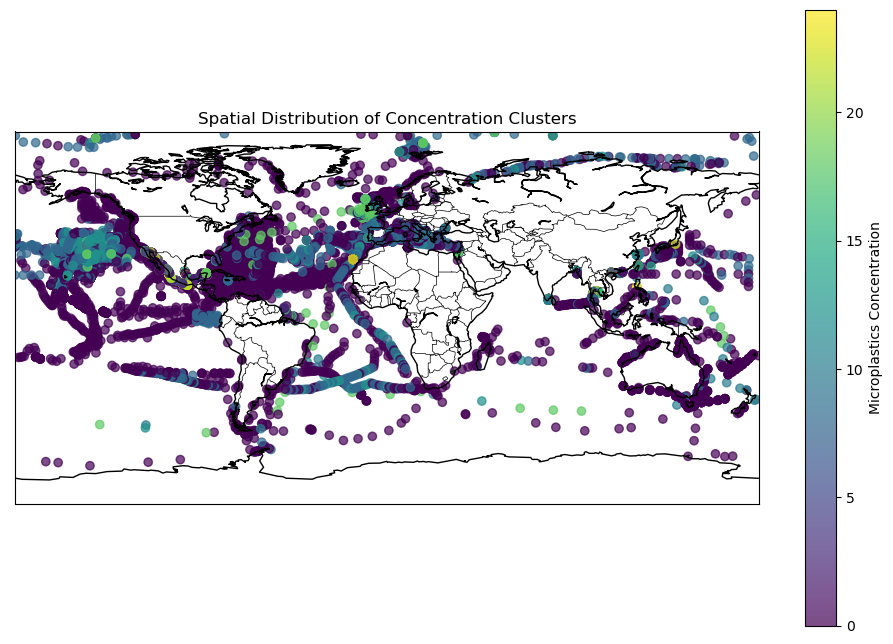

In [28]:
plt.figure(figsize=(12, 8))


m2 = Basemap(projection='cyl')


m2.drawcoastlines()
m2.drawcountries()

m2.scatter(gdf['Longitude'].values, gdf['Latitude'].values, c=gdf['cluster'], cmap='viridis', alpha=0.7)

plt.colorbar(label='Microplastics Concentration')
plt.title('Spatial Distribution of Concentration Clusters')


In [29]:

map